<p align="center"><b><font size="+2">📊 TELECOM X – PARTE 2: PREDICCIÓN DE CANCELACIÓN (CHURN) 🔍</font></b></p>

# **1. 🛠️ Preparación de los Datos**

## Extracción del Archivo Tratado

In [1585]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1586]:
df = pd.read_csv('datos_limpios.csv')

In [1587]:
df.head()

,id_cliente,abandono_servicio,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefonico,varias_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,tv_cable,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,gasto_mensual,gasto_total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [1588]:
df.columns

Index(['id_cliente', 'abandono_servicio', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefonico',
       'varias_lineas', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_cable', 'streaming_peliculas', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'gasto_mensual', 'gasto_total',
       'cuenta_diaria'],
      dtype='object')

In [1589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7032 non-null   object 
 1   abandono_servicio       7032 non-null   object 
 2   genero                  7032 non-null   object 
 3   adulto_mayor            7032 non-null   int64  
 4   pareja                  7032 non-null   object 
 5   dependientes            7032 non-null   object 
 6   meses_contrato          7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   object 
 8   varias_lineas           7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_en_linea      7032 non-null   object 
 11  respaldo_en_linea       7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  tv_cable                7032 non-null   

In [1590]:
df.isnull().sum()

,0
id_cliente,0
abandono_servicio,0
genero,0
adulto_mayor,0
pareja,0
dependientes,0
meses_contrato,0
servicio_telefonico,0
varias_lineas,0
servicio_internet,0


## Eliminación de Columnas Irrelevantes

En este caso "id_cliente" es un identificador único, así que no tiene valor para la predicción:

In [1591]:
df = df.drop(columns = ['id_cliente'])

Estandarizar valores especiales:

In [1592]:
cols_internet = [
    'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
    'soporte_tecnico', 'tv_cable', 'streaming_peliculas'
]
df[cols_internet] = df[cols_internet].replace({'No internet service': 'No'})

df['varias_lineas'] = df['varias_lineas'].replace({'No phone service': 'No'})

## Encoding

In [1593]:
# para crear uno nuevo
df_clean = df.copy()

categorical_cols = [
       'adulto_mayor', 'abandono_servicio', 'genero', 'pareja', 'dependientes',
       'servicio_telefonico', 'varias_lineas', 'servicio_internet',
       'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_cable', 'streaming_peliculas', 'tipo_contrato',
       'factura_electronica', 'metodo_pago'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

## Verificación de la Proporción de Cancelación (Churn)

In [1594]:
# Calcular la proporción de la columna 'abandono_servicio_Yes'
proporcion_churn = df_encoded['abandono_servicio_Yes'].value_counts(normalize=True)

# Mostrar la proporción
print("Proporción de cancelación (Churn):")
display(proporcion_churn)

Proporción de cancelación (Churn):


,proportion
abandono_servicio_Yes,
False,0.734215
True,0.265785


## Normalización o Estandarización

In [1595]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_numericas = ['meses_contrato', 'gasto_mensual', 'gasto_total', 'cuenta_diaria']
df_encoded[cols_numericas] = scaler.fit_transform(df[cols_numericas])


In [1596]:
df_encoded.head()

,meses_contrato,gasto_mensual,gasto_total,cuenta_diaria,adulto_mayor_1,abandono_servicio_Yes,genero_Male,pareja_Yes,dependientes_Yes,servicio_telefonico_Yes,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,tv_cable_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,factura_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.954296,0.026652,-0.745607,0.030023,False,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,-0.954296,-0.162819,-0.768063,-0.159431,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-1.158016,0.302548,-0.883456,0.299246,False,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,-0.791321,1.103642,-0.461240,1.106917,True,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,-1.198760,0.634952,-0.889390,0.638269,True,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# **2. 🎯 Correlación y Selección de Variables**

## Análisis de Correlación

In [1597]:
# Convertimos bool → int para que la correlación se calcule correctamente
df_corr = df_encoded.astype(int)

# Matriz de correlación
corr_matrix = df_corr.corr()

# Correlaciones con la variable objetivo
corr_target = corr_matrix['abandono_servicio_Yes'].sort_values(ascending=False)
print(corr_target)


abandono_servicio_Yes                  1.000000
servicio_internet_Fiber optic          0.307463
metodo_pago_Electronic check           0.301455
factura_electronica_Yes                0.191454
cuenta_diaria                          0.170912
gasto_mensual                          0.168497
adulto_mayor_1                         0.150541
tv_cable_Yes                           0.063254
streaming_peliculas_Yes                0.060860
varias_lineas_Yes                      0.040033
servicio_telefonico_Yes                0.011691
genero_Male                           -0.008545
proteccion_dispositivo_Yes            -0.066193
respaldo_en_linea_Yes                 -0.082307
metodo_pago_Mailed check              -0.090773
metodo_pago_Credit card (automatic)   -0.134687
gasto_total                           -0.136042
pareja_Yes                            -0.149982
dependientes_Yes                      -0.163128
soporte_tecnico_Yes                   -0.164716
seguridad_en_linea_Yes                -0

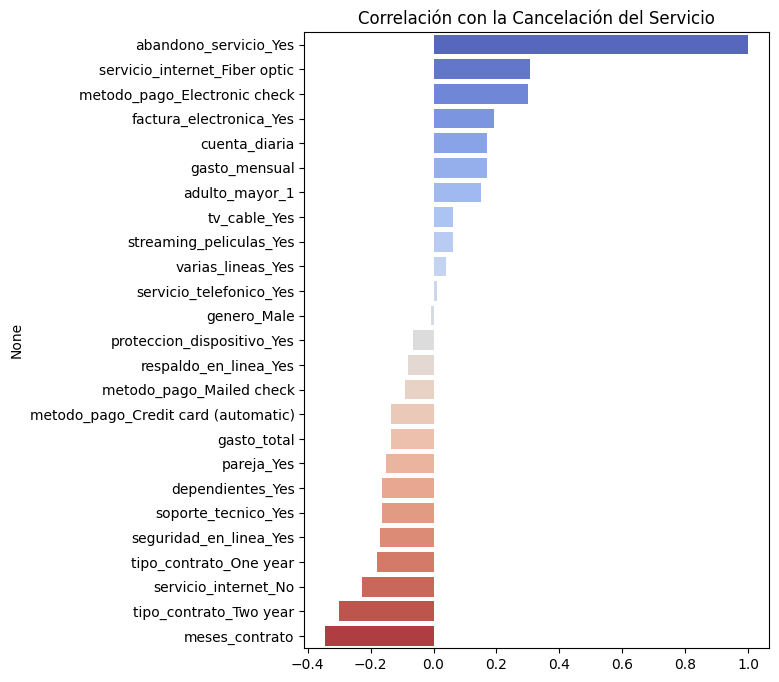

In [1598]:
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm', hue=corr_target.index, legend=False)
plt.title("Correlación con la Cancelación del Servicio")
plt.show()

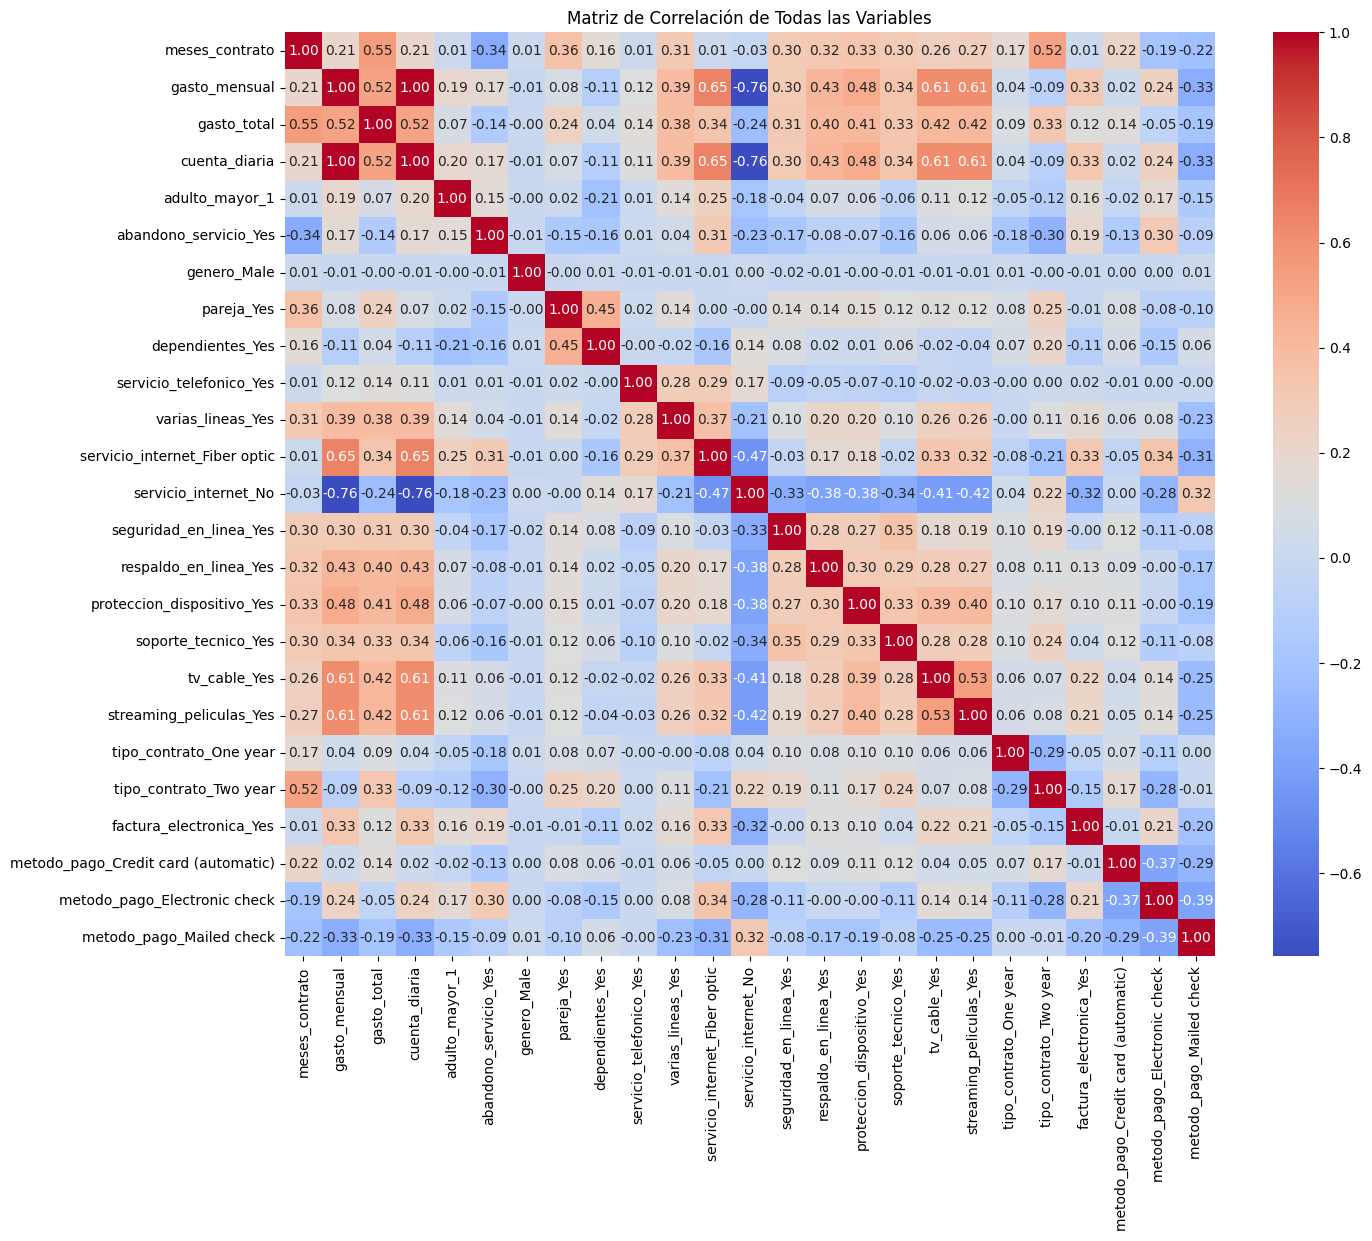

In [1599]:
# Matriz de correlación de todas las variables
plt.figure(figsize=(15, 12)) # Ajustar el tamaño para mejor visualización
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f") # annot=True para mostrar los valores
plt.title("Matriz de Correlación de Todas las Variables")
plt.show()

## Análisis Dirigido

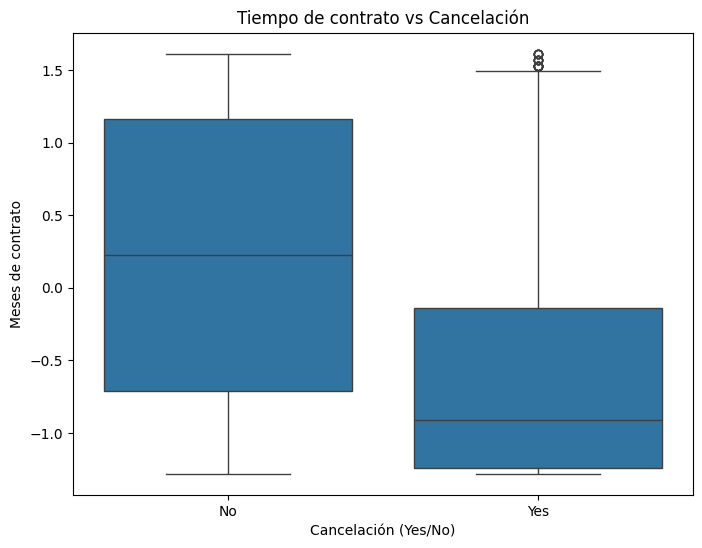

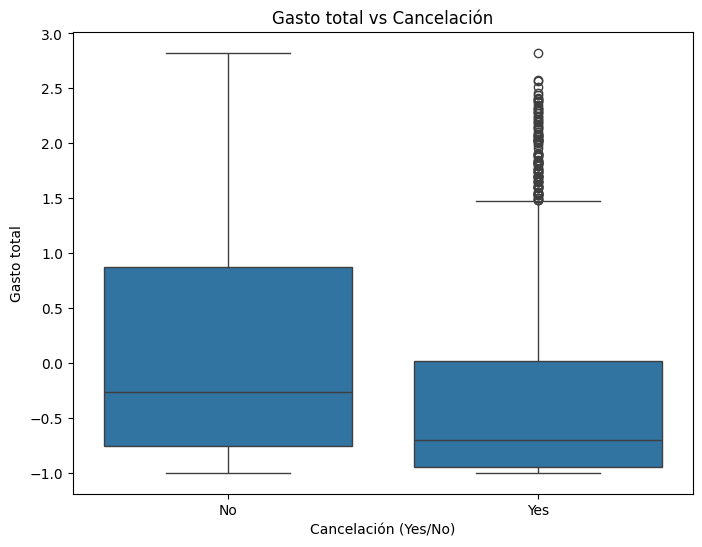

In [1600]:
# Análisis de Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='abandono_servicio_Yes', y='meses_contrato', data=df_encoded)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación (Yes/No)')
plt.ylabel('Meses de contrato')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Análisis de Gasto total vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='abandono_servicio_Yes', y='gasto_total', data=df_encoded)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación (Yes/No)')
plt.ylabel('Gasto total')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Análisis de Multicolinealidad

In [1601]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creamos un DataFrame solo con variables numéricas (sin la variable objetivo)
X = df_encoded.drop(columns=['abandono_servicio_Yes'])

# Convert boolean columns to numeric (0 or 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Calculamos VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Ordenamos por VIF descendente
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                               Variable            VIF
3                         cuenta_diaria  115423.992996
1                         gasto_mensual  115362.109427
2                           gasto_total      10.810988
8               servicio_telefonico_Yes      10.299473
10        servicio_internet_Fiber optic       7.627698
0                        meses_contrato       7.583935
11                 servicio_internet_No       6.862828
19               tipo_contrato_Two year       3.489972
16                         tv_cable_Yes       3.054803
17              streaming_peliculas_Yes       3.030462
22         metodo_pago_Electronic check       2.972974
20              factura_electronica_Yes       2.965598
6                            pareja_Yes       2.830170
9                     varias_lineas_Yes       2.640852
23             metodo_pago_Mailed check       2.402733
14           proteccion_dispositivo_Yes       2.267265
13                respaldo_en_linea_Yes       2.093336
15        

In [1602]:
# Eliminamos las columnas con mayor VIF y redundancia
df_reducido = df_encoded.drop(columns=['cuenta_diaria', 'gasto_total', 'servicio_telefonico_Yes', 'servicio_internet_No'])

In [1603]:
# Creamos un DataFrame solo con variables numéricas (sin la variable objetivo)
X = df_reducido.drop(columns=['abandono_servicio_Yes'])

# Convertimos las columnas booleanas a numéricas (0 o 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Calculamos VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Ordenamos por VIF descendente
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                               Variable       VIF
1                         gasto_mensual  6.016652
7         servicio_internet_Fiber optic  5.309703
15               tipo_contrato_Two year  3.280392
12                         tv_cable_Yes  2.908912
13              streaming_peliculas_Yes  2.904152
4                            pareja_Yes  2.787043
16              factura_electronica_Yes  2.777960
18         metodo_pago_Electronic check  2.728205
0                        meses_contrato  2.536529
6                     varias_lineas_Yes  2.295469
10           proteccion_dispositivo_Yes  2.245722
19             metodo_pago_Mailed check  2.244735
11                  soporte_tecnico_Yes  2.035993
9                 respaldo_en_linea_Yes  2.029408
14               tipo_contrato_One year  1.970467
5                      dependientes_Yes  1.963325
3                           genero_Male  1.960248
17  metodo_pago_Credit card (automatic)  1.885931
8                seguridad_en_linea_Yes  1.835593


# **3. 🤖 Modelado Predictivo**

In [1604]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

## Separación de Datos

In [1605]:
# Separar variables predictoras y objetivo
X = df_reducido.drop(columns=['abandono_servicio_Yes'])
y = df_reducido['abandono_servicio_Yes']

In [1606]:
# Dividir en train y test (estratificado para balancear proporciones)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

Balancear entrenamiento con SMOTE

In [1607]:
# Balancear la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Escalar las variables

In [1608]:
# Escalar variables numéricas
scaler = StandardScaler()
# Fit the scaler only on the original X_train
scaler.fit(X_train_res)

# Transform X_train, X_train_res, and X_test
X_train_res_scaled = scaler.transform(X_train_res)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creación de Modelos

### Modelo de Regresión Logística

In [1609]:
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

Evaluar en el test set original (sin SMOTE)

In [1610]:
# Evaluar el modelo
y_pred = log_reg.predict(X_test_scaled)
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1]))

=== Regresión Logística ===
              precision    recall  f1-score   support

       False       0.88      0.76      0.82      1549
        True       0.52      0.72      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110

ROC-AUC: 0.8258637336030721


### Modelo Random Forest

In [1611]:
# Modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
# Use the resampled and scaled training data
rf.fit(X_train_res_scaled, y_train_res)

# Predicciones y métricas
y_pred_rf = rf.predict(X_test_scaled)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))

=== Random Forest ===
              precision    recall  f1-score   support

       False       0.85      0.83      0.84      1549
        True       0.56      0.61      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.77      0.77      0.77      2110

ROC-AUC: 0.8081051658881758


### Modelo Gradient Boosting

In [1612]:
# --- Modelo Gradient Boosting ---
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Entrenamiento
gb.fit(X_train_res_scaled, y_train_res)

# Predicción
y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

=== Gradient Boosting ===
              precision    recall  f1-score   support

       False       0.88      0.79      0.83      1549
        True       0.54      0.71      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110

ROC-AUC: 0.836573880682034


## Evaluación de los Modelos

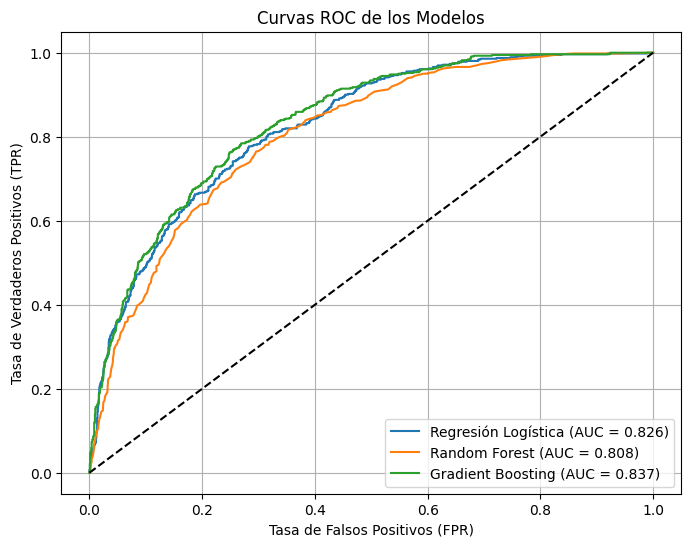

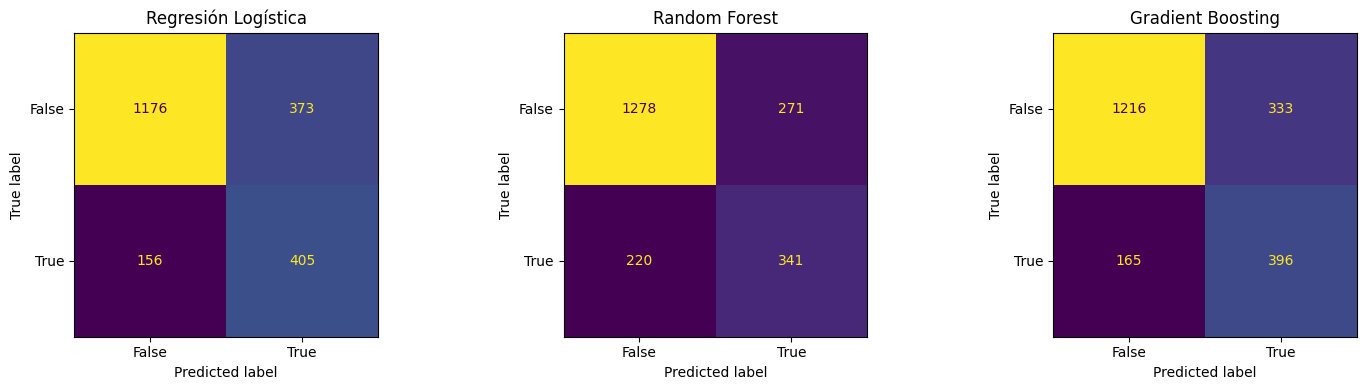

In [1613]:
# --- CURVA ROC ---
# Diccionario para almacenar modelos y nombres
modelos = {
    "Regresión Logística": log_reg,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

# --- Curvas ROC ---
plt.figure(figsize=(8,6))
for nombre, modelo in modelos.items():
    y_pred_proba = modelo.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de los Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- MATRICES DE CONFUSIÓN ---
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, (nombre, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(nombre)
plt.tight_layout()
plt.show()

## 🔍 Comparación de Métricas de los Modelos

Basándonos en los resultados de los calculos para cada modelo, se obtiene la siguiente comparación:

1. Resumen de desempeño

| Métrica         | Regresión Logística | Random Forest | Gradient Boosting |
|-----------------|---------------------|---------------|-------------------|
| Exactitud       | 0.75                | 0.77          | 0.76              |
| Precisión (Yes) | 0.52                | 0.56          | 0.54              |
| Recall (Yes)    | 0.72                | 0.61          | 0.71              |
| F1-score (Yes)  | 0.60                | 0.58          | 0.61              |
| ROC-AUC         | 0.826               | 0.808         | 0.837             |

2. Análisis crítico
 - Exactitud (accuracy): Random Forest tiene la mayor exactitud (0.77), seguida de Gradient Boosting (0.76) y Regresión Logística (0.75). Sin embargo, la exactitud puede ser engañosa si las clases están desbalanceadas, lo cual es común en problemas de churn.

 - Precisión para clase positiva ("Yes"): Random Forest muestra la precisión más alta (0.56), lo que indica que sus predicciones positivas son más confiables (menos falsos positivos). Regresión Logística tiene la menor precisión (0.52).

 - Recall para clase positiva: Regresión Logística y Gradient Boosting tienen un recall alto (~0.71-0.72), es decir, identifican más clientes que realmente abandonan (menos falsos negativos). Random Forest tiene menor recall (0.61), sacrificando sensibilidad por mayor precisión.

 - F1-score (compromiso precisión-recall): Gradient Boosting lidera ligeramente (0.61), seguido de Regresión Logística (0.60) y Random Forest (0.58).

 - ROC-AUC (capacidad discriminativa global): Gradient Boosting es el mejor (0.837), luego Regresión Logística (0.826) y Random Forest (0.808).

3. ¿Cuál modelo tuvo el mejor desempeño?

 - Gradient Boosting ofrece el mejor equilibrio general, especialmente en F1-score y ROC-AUC, que son métricas más robustas para problemas con clases desbalanceadas.

 - Aunque Random Forest tiene la mayor exactitud y precisión, su recall más bajo implica que no detecta tantos casos positivos (abandono) como los otros dos, lo cual podría ser crítico para un negocio.

 - Regresión Logística es más simple y rápida, y su desempeño es competitivo, especialmente con buen recall, pero queda detrás en ROC-AUC y precisión.

4. ¿Algún modelo presenta overfitting o underfitting?

 Para evaluar overfitting o underfitting, idealmente compararíamos desempeño en train vs test (o usando validación cruzada). Con solo métricas de test, el análisis es limitado, pero:

 - Random Forest y Gradient Boosting son modelos más complejos y potentes. Su desempeño en test es bueno pero no excepcionalmente alto. La diferencia entre train y test puede indicar overfitting, especialmente si en train la exactitud o AUC es mucho mayor.

 - La Regresión Logística es un modelo lineal y simple, lo que puede indicar que si no tiene buen desempeño en test, podría estar bajoajustando (underfitting).

 Si notas que Random Forest tiene una exactitud muy alta en train y significativamente menor en test, puede estar sobreajustando. Lo mismo aplica para Gradient Boosting.


# **4. 📋 Interpretación y Conclusiones**


## Análisis de la Importancia de las Variables


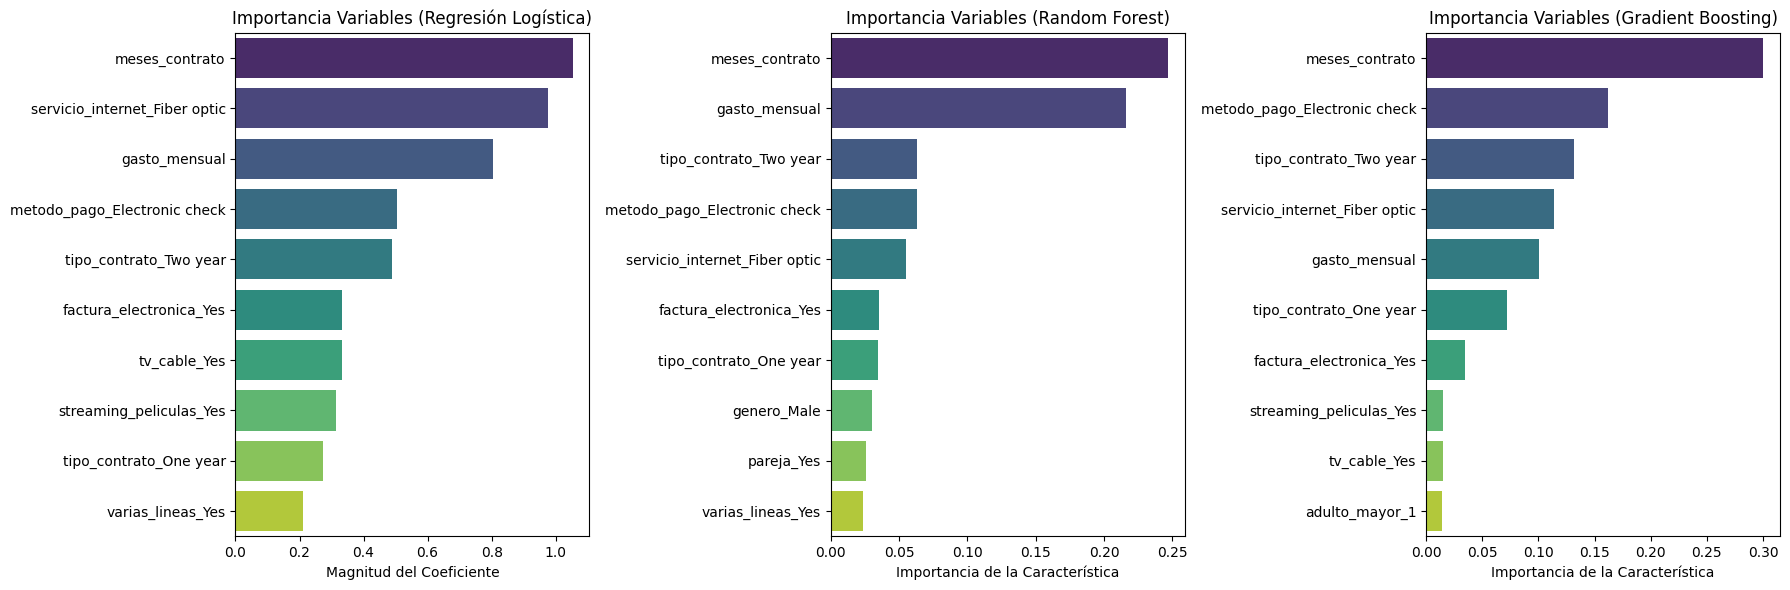

In [1614]:
# Regresión Logística: coeficientes absolutos
log_reg_importances = pd.DataFrame({
    'Variable': X.columns,
    'Magnitud': abs(log_reg.coef_[0])
}).sort_values(by='Magnitud', ascending=False)

# Random Forest: feature_importances_
rf_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Gradient Boosting: feature_importances_
gb_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': gb.feature_importances_
}).sort_values(by='Importancia', ascending=False)


# Visualización comparativa de la importancia de las variables

plt.figure(figsize=(18, 6))

# Gráfico para Regresión Logística
plt.subplot(1, 3, 1)
sns.barplot(x='Magnitud', y='Variable', data=log_reg_importances.head(10), palette='viridis', hue='Variable', legend=False)
plt.title('Importancia Variables (Regresión Logística)')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('')

# Gráfico para Random Forest
plt.subplot(1, 3, 2)
sns.barplot(x='Importancia', y='Variable', data=rf_importances.head(10), palette='viridis', hue='Variable', legend=False)
plt.title('Importancia Variables (Random Forest)')
plt.xlabel('Importancia de la Característica')
plt.ylabel('')

# Gráfico para Gradient Boosting
plt.subplot(1, 3, 3)
sns.barplot(x='Importancia', y='Variable', data=gb_importances.head(10), palette='viridis', hue='Variable', legend=False)
plt.title('Importancia Variables (Gradient Boosting)')
plt.xlabel('Importancia de la Característica')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Conclusión

### 📝 Informe: Factores de Influencia en la Cancelación y Estrategias de Retención

Este informe presenta un análisis detallado de los factores que influyen en la cancelación del servicio (churn) de los clientes de Telecom X, basado en el modelado predictivo realizado. Se identifican las variables más relevantes y se proponen estrategias de retención alineadas con los resultados obtenidos para mitigar la pérdida de clientes.

#### 1. Factores Clave que Influyen en la Cancelación

Basado en el análisis de importancia de variables de los modelos predictivos (Regresión Logística, Random Forest y Gradient Boosting), se identifican los siguientes factores como los más influyentes en la probabilidad de que un cliente cancele el servicio:

*   **Duración del Contrato (`meses_contrato`):** Consistentemente la variable más importante en todos los modelos. Los clientes con una menor antigüedad en el servicio (menos meses de contrato) presentan una mayor propensión a cancelar. Esto resalta la criticidad de los primeros meses de servicio para la retención de clientes.

*   **Tipo de Contrato (`tipo_contrato_Two year`, `tipo_contrato_One year`):** El tipo de contrato a largo plazo (dos años) tiene una fuerte correlación negativa con la cancelación, lo que indica que los clientes con este tipo de contrato son significativamente menos propensos a abandonar. Los contratos mensuales (`Month-to-month`) están asociados a una mayor tasa de churn. Esto enfatiza la importancia de migrar clientes a contratos de mayor duración.

*   **Servicio de Internet (`servicio_internet_Fiber optic`, `servicio_internet_No`):** La presencia del servicio de Fibra Óptica (`Fiber optic`) está asociada con una mayor probabilidad de cancelación, mientras que la ausencia de servicio de internet (`No`) se relaciona con una menor probabilidad de churn. Este hallazgo sugiere posibles problemas de calidad, soporte o expectativas insatisfechas con el servicio de fibra óptica.

*   **Método de Pago (`metodo_pago_Electronic check`):** Los clientes que utilizan el pago electrónico (`Electronic check`) muestran una mayor propensión a cancelar en comparación con otros métodos de pago. Esto podría estar vinculado a la facilidad para cambiar de proveedor o a inconvenientes específicos asociados a este método.

*   **Gasto Mensual (`gasto_mensual`):** Un mayor gasto mensual tiende a estar asociado con una mayor probabilidad de cancelación según los modelos. Esto podría indicar que los clientes con mayores gastos son más sensibles a la relación calidad-precio o son un objetivo más atractivo para las ofertas de la competencia.

*   **Factura Electrónica (`factura_electronica_Yes`):** Los clientes que optan por la factura electrónica parecen tener una mayor propensión a cancelar.

Otras variables como `adulto_mayor`, `pareja`, `dependientes`, `varias_lineas`, `seguridad_en_linea`, `respaldo_en_linea`, `proteccion_dispositivo`, `soporte_tecnico`, `tv_cable`, y `streaming_peliculas` también contribuyen a la predicción del churn, aunque con una influencia generalmente menor en comparación con los factores mencionados anteriormente.

#### 2. Rendimiento de los Modelos Predictivos

Se evaluaron tres modelos predictivos para identificar a los clientes propensos a cancelar: Regresión Logística, Random Forest y Gradient Boosting.

*   **Gradient Boosting:** Demostró ser el modelo con el mejor desempeño general, evidenciado por el ROC-AUC más alto (0.837). Este modelo logra un buen equilibrio entre la identificación correcta de clientes que cancelan (Recall) y la minimización de la predicción errónea de cancelación (Precisión), resultando en el mejor F1-score. Su naturaleza no lineal le permite capturar interacciones complejas entre las variables predictoras.

*   **Regresión Logística:** Presentó un rendimiento competitivo (ROC-AUC de 0.826) y destacó por obtener el Recall más alto (0.72) para la clase de cancelación. Esto significa que este modelo es el más efectivo para identificar a la mayor proporción de clientes que eventualmente cancelarán, lo cual puede ser una prioridad estratégica para implementar acciones de retención proactivas, aunque su precisión es ligeramente menor.

*   **Random Forest:** Si bien mostró una buena Exactitud general (0.77) y la Precisión más alta (0.56) para la clase de cancelación, su Recall fue notablemente más bajo (0.61) en comparación con los otros modelos. Esto implica que Random Forest predice la cancelación con mayor confianza cuando lo hace, pero no logra identificar a tantos clientes que cancelan como los otros modelos.

Considerando el objetivo de predecir y prevenir la cancelación, la capacidad de identificar correctamente a los clientes en riesgo (Recall y ROC-AUC) es fundamental. En este sentido, los modelos **Gradient Boosting** y **Regresión Logística** se perfilan como los más adecuados para implementar estrategias de retención dirigidas, con Gradient Boosting ofreciendo un mejor balance general y Regresión Logística destacando en la maximización de la detección de casos positivos.

#### 3. Estrategias de Retención Propuestas

Basado en los factores de influencia identificados y el rendimiento de los modelos predictivos, se proponen las siguientes estrategias de retención de clientes:

*   **Programas de Bienvenida y Onboarding Proactivo:** Dado que los primeros meses son críticos, implementar un programa estructurado de bienvenida y seguimiento para nuevos clientes. Esto puede incluir comunicación regular, tutoriales sobre el uso del servicio, encuestas de satisfacción tempranas y soporte técnico prioritario para abordar cualquier problema inicial rápidamente.

*   **Incentivos para Contratos a Largo Plazo:** Desarrollar y promocionar activamente ofertas y descuentos atractivos para migrar a los clientes de contratos mensuales a contratos de uno o dos años. Resaltar los beneficios de la estabilidad del precio y los servicios adicionales incluidos en los planes de mayor duración.

*   **Mejora del Servicio de Fibra Óptica:** Realizar un análisis profundo de las causas específicas de la mayor tasa de churn entre los usuarios de fibra óptica. Esto podría implicar mejoras técnicas en la red, capacitación del personal de soporte para manejar problemas comunes de fibra, o una comunicación más clara sobre las capacidades y limitaciones del servicio. Considerar encuestas de satisfacción específicas para este segmento.

*   **Optimización de la Experiencia de Pago Electrónico:** Investigar las posibles razones detrás de la mayor cancelación entre los usuarios de pago electrónico. Esto podría llevar a mejoras en la plataforma de pago, ofrecer alternativas de pago más estables con incentivos, o proporcionar soporte adicional a los usuarios que experimentan dificultades con este método.

*   **Programas de Fidelización para Clientes de Alto Valor:** Implementar un programa de fidelización dirigido a clientes con alto gasto mensual. Esto podría incluir beneficios exclusivos, acceso prioritario a nuevos servicios o promociones, o un gestor de cuenta dedicado para fortalecer la relación y aumentar la percepción de valor.

*   **Análisis y Mejora de la Factura Electrónica:** Revisar el diseño y contenido de la factura electrónica para asegurar su claridad y facilidad de comprensión. Recopilar feedback de los clientes sobre este formato y realizar ajustes si es necesario para evitar confusiones que puedan llevar a la insatisfacción.

*   **Promoción de Paquetes de Servicios (Bundling):** Fomentar la contratación de múltiples servicios (internet, teléfono, TV, seguridad, etc.) ofreciendo paquetes atractivos y con descuento. Los clientes con más servicios tienden a estar más fidelizados.

*   **Segmentación y Campañas Dirigidas:** Utilizar los modelos predictivos (especialmente Gradient Boosting o Regresión Logística) para identificar a los clientes con mayor probabilidad de cancelar. Implementar campañas de retención proactivas y personalizadas para estos segmentos de alto riesgo, ofreciendo soluciones específicas o incentivos para evitar su partida.

Es fundamental implementar estas estrategias de manera segmentada y medir continuamente su impacto en la tasa de retención. Un monitoreo constante permitirá ajustar las tácticas y optimizar los esfuerzos de retención para maximizar su efectividad.